
# Data Exploration

In [2]:
# TODO: Gereksizler cikarilmali
import cv2
from PIL import Image
import numpy as np 
import pandas as pd
import os 
import seaborn as sns
from collections import Counter
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import gc
from datetime import datetime
import statistics

### Getting Images ###

In [3]:
polen_dosya_adresi = "C:\\Users\\Tunah\\OneDrive\\Masaüstü\okul\\ENS 491\\pollen_data\\pollen\\"
siniflar_listesi = os.listdir(polen_dosya_adresi)
print("Total number of classes is {}".format(len(siniflar_listesi)))

Total number of classes is 268


In [4]:
'''
İleride kullanilabilecek bilgilerin alinmasi
'''

fotograf_sirasiyla_etiketi_listesi = []   
sinif_adresi_sozlugu  = {}                
foto_adresi_listesi = []                  

for dosya_adi in siniflar_listesi:
  adres_listesi = [] 
  adres = polen_dosya_adresi + dosya_adi + "\\"

  for foto_adi in os.listdir(adres):
    fotograf_sirasiyla_etiketi_listesi.append(dosya_adi)
    fotograf_adresi = adres + foto_adi
    adres_listesi.append(fotograf_adresi)
    foto_adresi_listesi.append(fotograf_adresi)

  sinif_adresi_sozlugu[dosya_adi] = adres_listesi

all_images = Counter(fotograf_sirasiyla_etiketi_listesi)


In [5]:
print("fotograf_sirasiyla_etiketi_listesi: ", fotograf_sirasiyla_etiketi_listesi[:10])
print("fotograf_sirasiyla_etiketi_listesi: ", len(fotograf_sirasiyla_etiketi_listesi))
print("sinif_adresi_sozlugu: ",list(sinif_adresi_sozlugu)[:10])
print("sinif_adresi_sozlugu: ",len(sinif_adresi_sozlugu))
print("foto_adresi_listesi: ",foto_adresi_listesi[:10])
print("foto_adresi_listesi: ",len(foto_adresi_listesi))
print("all_images: ",list(all_images)[:10])
print("all_images: ",len(all_images))
print("all_images: ", sum(list(all_images.values())))

fotograf_sirasiyla_etiketi_listesi:  ['Acantholimon acerosum', 'Acantholimon acerosum', 'Acantholimon acerosum', 'Acantholimon acerosum', 'Acantholimon armenum', 'Acantholimon armenum', 'Acantholimon armenum', 'Acantholimon armenum', 'Acantholimon calvertii', 'Acantholimon calvertii']
fotograf_sirasiyla_etiketi_listesi:  1775
sinif_adresi_sozlugu:  ['Acantholimon acerosum', 'Acantholimon armenum', 'Acantholimon calvertii', 'Acanthus dioscoridis', 'Acanthus sp', 'Achilla arabica', 'Achillea millefolium', 'Achillea vermicularis', 'Aethionema grandiflorum', 'Agrimonia repens']
sinif_adresi_sozlugu:  268
foto_adresi_listesi:  ['C:\\Users\\Tunah\\OneDrive\\Masaüstü\\okul\\ENS 491\\pollen_data\\pollen\\Acantholimon acerosum\\Acantholimon acerosum11 100x.jpg', 'C:\\Users\\Tunah\\OneDrive\\Masaüstü\\okul\\ENS 491\\pollen_data\\pollen\\Acantholimon acerosum\\Acantholimon acerosum12 100x.jpg', 'C:\\Users\\Tunah\\OneDrive\\Masaüstü\\okul\\ENS 491\\pollen_data\\pollen\\Acantholimon acerosum\\Acant

### Some Statics Of Data ##

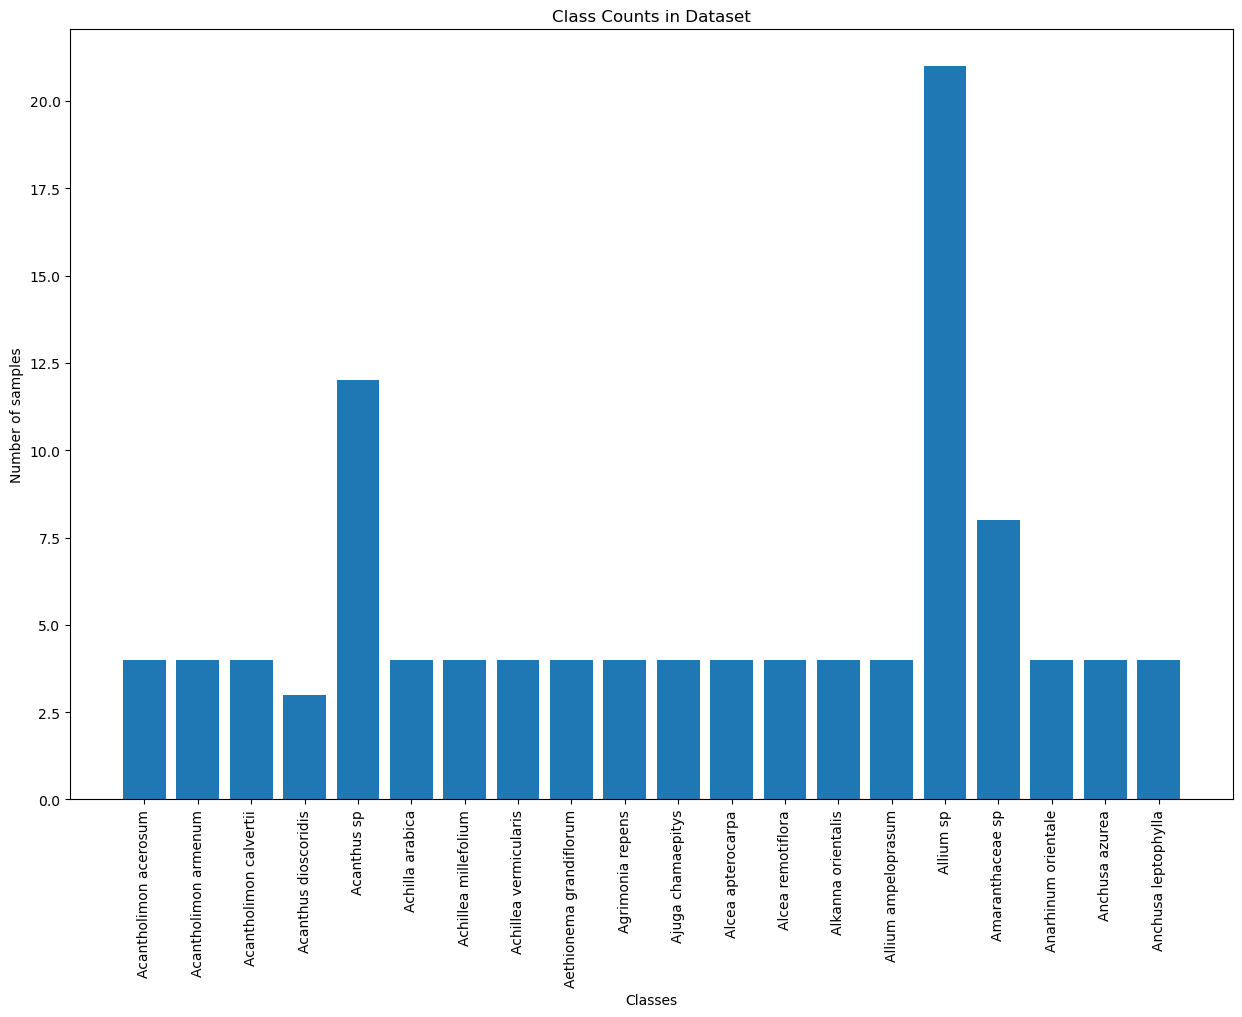

In [6]:
all_images_list = list(all_images.items())
plt.figure(figsize = (15,10))
plt.title('Class Counts in Dataset')
plt.bar(*zip(*all_images_list[0:20]))
plt.xticks(rotation='vertical')
plt.xlabel("Classes")
plt.ylabel("Number of samples")
plt.show()

In [7]:
list_for_stat = [y for x,y in all_images_list]
print("There are ", statistics.mean(list_for_stat), "number of photos for each class") 
print("The std of sample numbers for each class is", statistics.stdev(list_for_stat))
print("The class with the most number of photos is", list(all_images.keys())[list(all_images.values()).index(max(list(all_images.values())))],  max(list(all_images.values())))

There are  6.623134328358209 number of photos for each class
The std of sample numbers for each class is 7.05009803293707
The class with the most number of photos is Rosa canina 52


In [8]:
sayac = 0
for tur, adet in list(all_images.items()):
  if adet == min(all_images.values()):
    sayac += 1
    print(tur)

print(f"{sayac} adet sinif en dusuk fotograf sayisina sahip ({min(all_images.values())}) ")

Acanthus dioscoridis
Cerastium armeniacum
Chenopodium foliosum
Eremurus spectabilis
Ferula orientalis
Lecokia cretica
Malva neglecta
Muscari tenuifolium
Ornithogalum narbonense
Poaceae
Saponaria prostrata
Silene spergulifolia
12 adet sinif en dusuk fotograf sayisina sahip (3) 


### Visualization Of Data ###

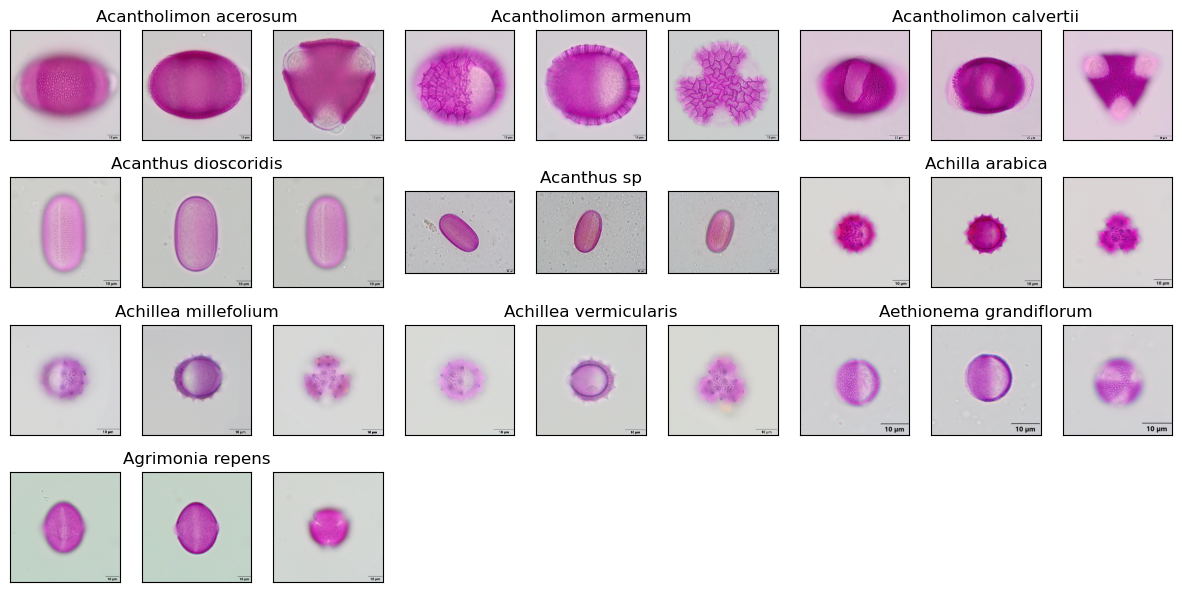

In [9]:
fig = plt.figure(figsize=(15, 15))
for i, key in enumerate(list(sinif_adresi_sozlugu.keys())[0:10]):
    img1 = Image.open(sinif_adresi_sozlugu[key][0]) 
    img2 = Image.open(sinif_adresi_sozlugu[key][1]) 
    img3 = Image.open(sinif_adresi_sozlugu[key][2]) 

    ax = fig.add_subplot(8, 9,  3*i + 1, xticks=[], yticks=[])
    ax.imshow(img1)
   #ax.set_title(key)
    
    ax = fig.add_subplot(8, 9,  3*i + 2, xticks=[], yticks=[])
    ax.imshow(img2)
    ax.set_title(key)

    ax = fig.add_subplot(8, 9,  3*i + 3, xticks=[], yticks=[])
    ax.imshow(img3)
   #ax.set_title(key)
    


### Shapes Of Images ###

In [10]:
size = []
bitis_gosterge = len(foto_adresi_listesi)
bitis_sayac = 0
for path in foto_adresi_listesi:
  bitis_sayac += 1
  if bitis_sayac % 50 == 0:
    print(bitis_sayac, " / ", bitis_gosterge, "\tprogress%", 100*bitis_sayac/bitis_gosterge)
  img = mpimg.imread(path)
  size.append(img.shape)

50  /  1775 	progress% 2.816901408450704
100  /  1775 	progress% 5.633802816901408
150  /  1775 	progress% 8.450704225352112
200  /  1775 	progress% 11.267605633802816
250  /  1775 	progress% 14.084507042253522
300  /  1775 	progress% 16.901408450704224
350  /  1775 	progress% 19.718309859154928
400  /  1775 	progress% 22.535211267605632
450  /  1775 	progress% 25.35211267605634
500  /  1775 	progress% 28.169014084507044
550  /  1775 	progress% 30.985915492957748
600  /  1775 	progress% 33.80281690140845
650  /  1775 	progress% 36.61971830985915
700  /  1775 	progress% 39.436619718309856
750  /  1775 	progress% 42.25352112676056
800  /  1775 	progress% 45.070422535211264
850  /  1775 	progress% 47.88732394366197
900  /  1775 	progress% 50.70422535211268
950  /  1775 	progress% 53.521126760563384
1000  /  1775 	progress% 56.33802816901409
1050  /  1775 	progress% 59.15492957746479
1100  /  1775 	progress% 61.971830985915496
1150  /  1775 	progress% 64.78873239436619
1200  /  1775 	progr

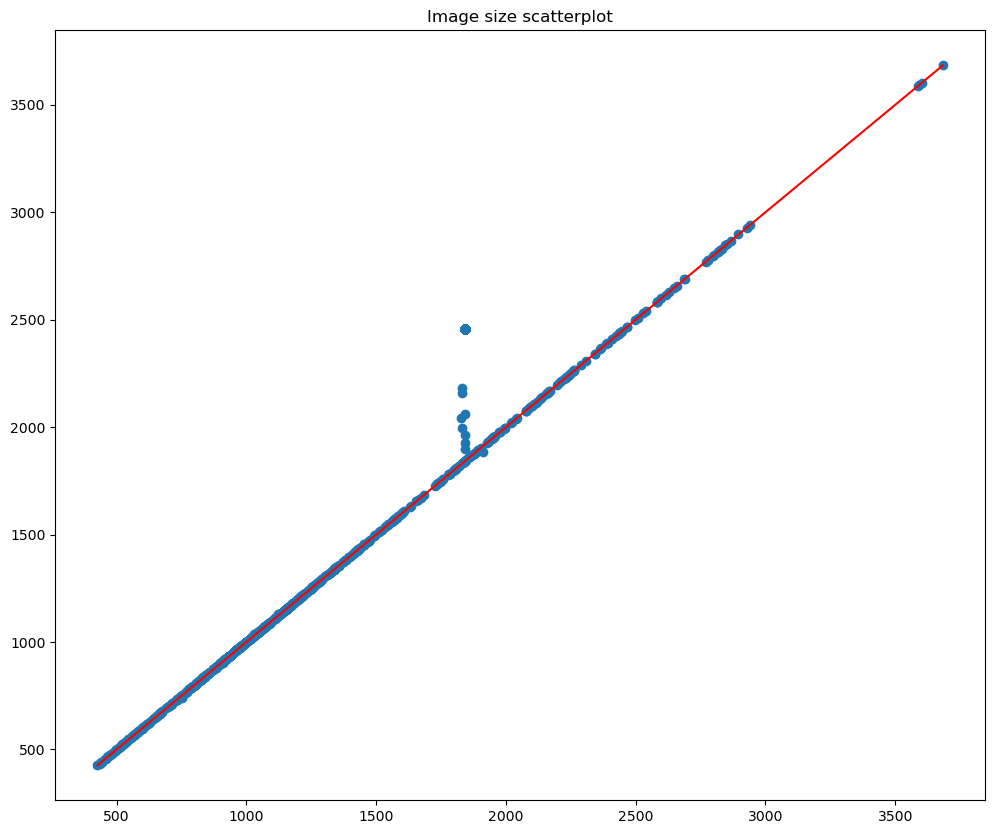

In [11]:
x, y, _ = zip(*size)

fig = plt.figure(figsize=(12, 10))
# scatter plot
plt.scatter(x,y)
plt.title("Image size scatterplot")

plt.plot([min(x),max(x)],[min(y),max(y)], 'r')